In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 9

import pandas as pd

In [2]:
treatment_times = pd.read_csv('csvs/treatment_times.csv', index_col=False)
treatment_times['datetime'] = pd.to_datetime(treatment_times['datetime'], format= "%Y-%m-%d %H:%M:%S")
# treatment_times['date'] = pd.to_datetime(treatment_times['date'], format= "%Y-%m-%d")

In [3]:
treatment_times

,pi,datetime,date,color
0,1,2024-07-11 05:02:04,2024-07-11,cnt
1,1,2024-07-11 05:02:06,2024-07-11,cnt
2,1,2024-07-11 05:02:08,2024-07-11,cnt
3,1,2024-07-11 05:02:11,2024-07-11,cnt
4,1,2024-07-11 05:02:13,2024-07-11,cnt
...,...,...,...,...
18163358,10,2024-09-08 11:27:30,2024-09-08,blv
18163359,10,2024-09-08 11:27:31,2024-09-08,blv
18163360,10,2024-09-08 11:27:32,2024-09-08,blv
18163361,10,2024-09-08 11:27:33,2024-09-08,blv


In [32]:
bombus_df = pd.read_csv('csvs/clean_dfs/bombus_df.csv')
bombus_df['datetime'] = pd.to_datetime(bombus_df['datetime'])
bombus_df = pd.merge(bombus_df, treatment_times[['pi', 'datetime', 'color']], on=['pi', 'datetime'], how='left')

bombus_df

bombus_visits = bombus_df[(bombus_df['time_diff'] > 4) | (bombus_df['time_diff'].isna())]

In [35]:
bombus_df2 = bombus_df.drop(columns='time_diff')
bombus_df2['time_diff'] = bombus_df2.groupby(['pi', 'date'
                                              ])['datetime'].diff().dt.total_seconds()
bombus_df2['new_visit'] = (bombus_df2['time_diff'] > 4) | (bombus_df2['time_diff'].isna())
bombus_df2['new_visit'].sum()

293

In [ ]:
bombus_df

In [30]:
bombus_visits_2 = bombus_df2[bombus_df2['new_visit'] == True]

,filename,species,sex,pi,datetime,date,color,time_diff,new_visit


In [33]:
bombus_visits[~bombus_visits['filename'].isin(bombus_visits_2['filename'])]

,filename,species,sex,pi,datetime,date,time_diff,color
498,pi1_20240905_073956.jpg,vosnesenskii,female,1,2024-09-05 07:39:56,2024-09-05,NaN,blv
750,pi4_20240718_180720.jpg,unk,unk,4,2024-07-18 18:07:20,2024-07-18,NaN,cnt
758,pi4_20240721_172750.jpg,unk,unk,4,2024-07-21 17:27:50,2024-07-21,NaN,cnt
1450,pi9_20240722_085645.jpg,vosnesenskii,female,9,2024-07-22 08:56:45,2024-07-22,NaN,grn
1618,pi9_20240723_094144.jpg,vosnesenskii,male,9,2024-07-23 09:41:44,2024-07-23,658.0,blv


In [5]:
long_visits = pd.read_csv('stationary_bombus_filelist.txt', header=None, names=['filename'])

long_visits[['pi', 'datetime']] = long_visits['filename'].str.extract(r'^pi(\d+)_(\d{8}_\d{6})')
long_visits['pi'] = long_visits['pi'].astype(int)
long_visits['datetime'] = pd.to_datetime(long_visits['datetime'], format='%Y%m%d_%H%M%S')
# file_df = file_df.rename(columns={0: 'filename'})
long_visits = long_visits.sort_values(by=['pi', 'datetime'], ascending=[True, True]).reset_index(drop=True)
long_visits['date'] = pd.to_datetime(long_visits['datetime'].dt.date)
# long_visits['time_diff'] = long_visits.groupby(['pi', 'date'])['datetime'].diff().dt.total_seconds()
# long_visits['time_diff'].fillna(1, inplace=True)

In [6]:
long_visits

,filename,pi,datetime,date
0,pi2_20240729_121103.jpg,2,2024-07-29 12:11:03,2024-07-29
1,pi2_20240729_121104.jpg,2,2024-07-29 12:11:04,2024-07-29
2,pi2_20240729_121105.jpg,2,2024-07-29 12:11:05,2024-07-29
3,pi2_20240729_121107.jpg,2,2024-07-29 12:11:07,2024-07-29
4,pi2_20240729_121108.jpg,2,2024-07-29 12:11:08,2024-07-29
...,...,...,...,...
5521,pi9_20240723_102459.jpg,9,2024-07-23 10:24:59,2024-07-23
5522,pi9_20240723_102500.jpg,9,2024-07-23 10:25:00,2024-07-23
5523,pi9_20240723_102501.jpg,9,2024-07-23 10:25:01,2024-07-23
5524,pi9_20240723_102502.jpg,9,2024-07-23 10:25:02,2024-07-23


In [7]:
bombus_df

,filename,species,sex,pi,datetime,date,color
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,cnt
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,cnt
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,cnt
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,cnt
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,cnt
...,...,...,...,...,...,...,...
1853,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,cnt
1854,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,blv
1855,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,blv
1856,pi9_20240804_121509.jpg,nevadensis,male,9,2024-08-04 12:15:09,2024-08-04,blv


In [8]:
combined_df = pd.concat([bombus_df, long_visits], ignore_index=True)
combined_df = combined_df.sort_values(by=['pi', 'datetime'])
columns_to_fill = ['species', 'sex', 'color']
combined_df[columns_to_fill] = combined_df[columns_to_fill].ffill()

In [9]:
combined_df

,filename,species,sex,pi,datetime,date,color
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,cnt
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,cnt
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,cnt
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,cnt
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,cnt
...,...,...,...,...,...,...,...
522,pi10_20240725_143849.jpg,vosnesenskii,unk,10,2024-07-25 14:38:49,2024-07-25,blu
523,pi10_20240725_145323.jpg,vosnesenskii,unk,10,2024-07-25 14:53:23,2024-07-25,blu
524,pi10_20240725_160336.jpg,vosnesenskii,male,10,2024-07-25 16:03:36,2024-07-25,blu
525,pi10_20240727_160758.jpg,vosnesenskii,male,10,2024-07-27 16:07:58,2024-07-27,blu


In [10]:
combined_df['time_diff'] = combined_df.groupby(['pi', 'date'])['datetime'].diff().dt.total_seconds()
bombus_df['time_diff'] = bombus_df.groupby(['pi', 'date'])['datetime'].diff().dt.total_seconds()

In [11]:
# bombus_df = combined_df.copy()

In [12]:
bombus_df['new_visit'] = (bombus_df['time_diff'] > 4) | (bombus_df['time_diff'].isna())
bombus_df['visit_id'] = bombus_df.groupby(['species'])['new_visit'].cumsum()

visit_durations = (
    bombus_df.groupby(['species', 'visit_id', 'pi', 'color'])['datetime']
    .agg(visit_start='min', visit_end='max')
    .reset_index()
)
visit_durations['duration'] = (
    (visit_durations['visit_end'] - visit_durations['visit_start']).dt.total_seconds()
)

visit_duration_distribution = visit_durations['duration']

In [13]:
bombus_df['new_visit'].sum()

293

In [14]:
bombus_df['visit_id'].max()

169

In [15]:
(()

SyntaxError: incomplete input (989707980.py, line 1)

In [44]:
visit_durations['pi_color'] = visit_durations['pi'].astype(str) + '_' + visit_durations['color']
visit_durations = visit_durations.sort_values(by='visit_start')
cumulative_visits = visit_durations.groupby(['pi_color', 'visit_start']).size().groupby(level=0).cumsum().reset_index(name='cumulative_count')

In [45]:
# periods = [('2024-07-11', '2024-07-18'),
#            ('2024-07-18', '2024-07-23'), 
#            ('2024-07-23', '2024-08-15'), 
#            ('2024-08-15', '2024-09-03'),
#            ('2024-09-03', '2024-09-10'), 
#            ]
periods = [('2024-07-11', '2024-07-17'),
           ('2024-07-18', '2024-07-23'), 
           ('2024-07-23', '2024-07-30')
           ]
periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in periods]
periods

[(Timestamp('2024-07-11 00:00:00'), Timestamp('2024-07-17 00:00:00')),
 (Timestamp('2024-07-18 00:00:00'), Timestamp('2024-07-23 00:00:00')),
 (Timestamp('2024-07-23 00:00:00'), Timestamp('2024-07-30 00:00:00'))]

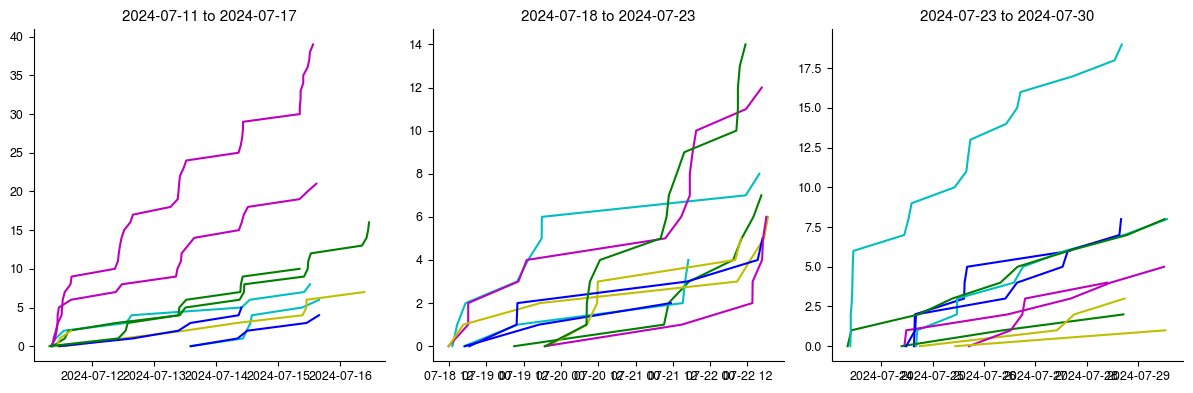

In [46]:
color_map = {
    'cnt': 'm',
    'blu': 'b',
    'blv': 'c',
    'grn': 'g',
    'yel': 'y'
}

fig, axes = plt.subplots(1, len(periods), figsize=(4 * len(periods), 4))

for i, (start, end) in enumerate(periods):
    period_subset = cumulative_visits[
        (cumulative_visits['visit_start'] >= start) & (cumulative_visits['visit_start'] <= end)
    ].copy()
    
    period_subset['adjusted_cumulative_count'] = (
        period_subset.groupby('pi_color')['cumulative_count']
        .transform(lambda x: x - x.min())
    )

    ax = axes[i] if len(periods) > 1 else axes 
    for key, group in period_subset.groupby('pi_color'):
        color_key = key.split('_')[-1]
        line_color = color_map.get(color_key, 'k')
        ax.plot(group['visit_start'], group['adjusted_cumulative_count'], label=key, color=line_color)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{start.date()} to {end.date()}')

plt.tight_layout()

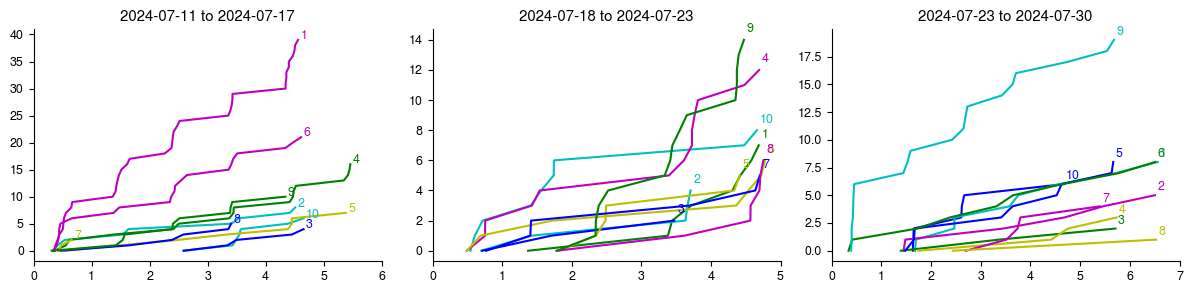

In [47]:
color_map = {
    'cnt': 'm',
    'blu': 'b',
    'blv': 'c',
    'grn': 'g',
    'yel': 'y'
}

fig, axes = plt.subplots(1, len(periods), figsize=(4 * len(periods), 3))

for i, (start, end) in enumerate(periods):
    period_subset = cumulative_visits[
        (cumulative_visits['visit_start'] >= start) & (cumulative_visits['visit_start'] <= end)
    ].copy()
    
    period_subset['adjusted_cumulative_count'] = (
        period_subset.groupby('pi_color')['cumulative_count']
        .transform(lambda x: x - x.min())
    )

    ax = axes[i]
    for key, group in period_subset.groupby('pi_color'):
        color_key = key.split('_')[-1]
        pi_key = key.split('_')[0]
        line_color = color_map.get(color_key, 'k')
        ax.plot(group['visit_start'], group['adjusted_cumulative_count'], label=key, color=line_color)
        ax.text(
            group['visit_start'].iloc[-1]+ pd.Timedelta(seconds=3600),
            group['adjusted_cumulative_count'].iloc[-1]+0.7,
            f'{pi_key}',
            color=line_color,
            fontsize=9,
            verticalalignment='center'
        )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{start.date()} to {end.date()}')
    ax.set_xticks(pd.date_range(start=start, end=end, freq='D'))
    ax.set_xticklabels([(tick - start).days for tick in pd.date_range(start=start, end=end, freq='D')])


plt.tight_layout()

In [48]:
treatment_times['pi_color'] = treatment_times['pi'].astype(str) + '_' + treatment_times['color']
treatment_times = treatment_times.sort_values('datetime')

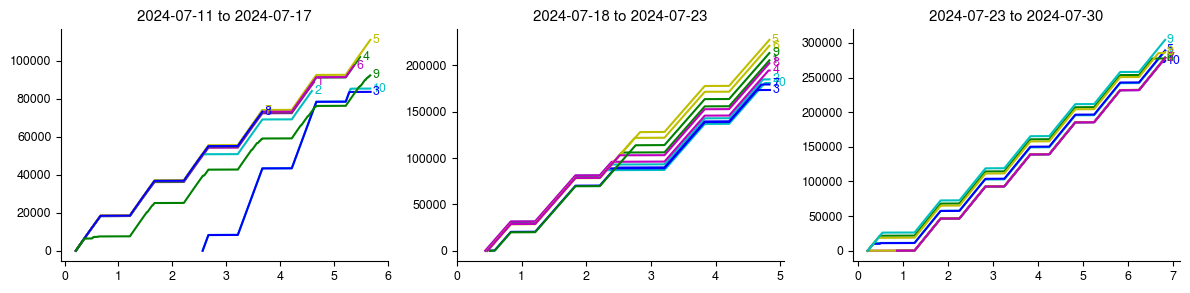

In [49]:
color_map = {
    'cnt': 'm',
    'blu': 'b',
    'blv': 'c',
    'grn': 'g',
    'yel': 'y'
}

fig, axes = plt.subplots(1, len(periods), figsize=(4 * len(periods), 3))

for i, (start, end) in enumerate(periods):
    period_subset = treatment_times[
        (treatment_times['datetime'] >= start) & (treatment_times['datetime'] <= end)
    ].copy()


    image_counts = (
    period_subset.groupby(['pi_color', 'datetime'])
    .size()
    .groupby(level=0)
    .cumsum()
    .reset_index(name='cumulative_count')   
    )

    image_counts['adjusted_cumulative_count'] = (
    image_counts.groupby('pi_color')['cumulative_count']
    .transform(lambda x: x - x.min())
    )

    ax = axes[i]
    for key, group in image_counts.groupby('pi_color'):
        color_key = key.split('_')[-1]
        pi_key = key.split('_')[0]
        line_color = color_map.get(color_key, 'k')
        ax.plot(group['datetime'], group['adjusted_cumulative_count'], label=key, color=line_color)
        ax.text(
            group['datetime'].iloc[-1]+ pd.Timedelta(seconds=3600),
            group['adjusted_cumulative_count'].iloc[-1]+0.7,
            f'{pi_key}',
            color=line_color,
            fontsize=9,
            verticalalignment='center'
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{start.date()} to {end.date()}')
    ax.set_xticks(pd.date_range(start=start, end=end, freq='D'))
    ax.set_xticklabels([(tick - start).days for tick in pd.date_range(start=start, end=end, freq='D')])


plt.tight_layout()

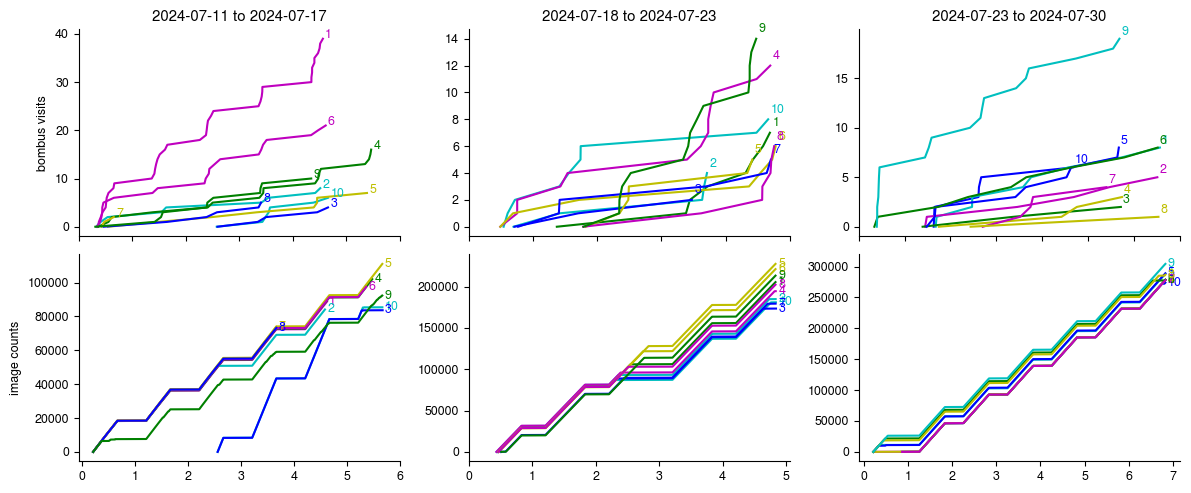

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(12, 5))  

num_periods = len(periods)
if num_periods > 6:
    raise ValueError("Cannot handle more than 6 periods in a 3x2 grid.")

for idx, (start, end) in enumerate(periods):
    ax = axes[0, idx]

    period_subset_visits = cumulative_visits[
        (cumulative_visits['visit_start'] >= start) & (cumulative_visits['visit_start'] <= end)
    ].copy()

    period_subset_visits['adjusted_cumulative_count'] = (
        period_subset_visits.groupby('pi_color')['cumulative_count']
        .transform(lambda x: x - x.min())
    )

    for key, group in period_subset_visits.groupby('pi_color'):
        color_key = key.split('_')[-1]
        pi_key = key.split('_')[0]
        line_color = color_map.get(color_key, 'k')
        ax.plot(group['visit_start'], group['adjusted_cumulative_count'], label=key, color=line_color)
        ax.text(
            group['visit_start'].iloc[-1] + pd.Timedelta(seconds=3600),
            group['adjusted_cumulative_count'].iloc[-1] + 0.7,
            f'{pi_key}',
            color=line_color,
            fontsize=9,
            verticalalignment='center'
        )
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(f'{start.date()} to {end.date()}')
    ax.set_xticks(pd.date_range(start=start, end=end, freq='D'))
    ax.set_xticklabels([])
    if idx == 0:
        ax.set_ylabel('bombus visits')

for idx, (start, end) in enumerate(periods):
    ax = axes[1, idx]

    period_subset_treatment = treatment_times[
        (treatment_times['datetime'] >= start) & (treatment_times['datetime'] <= end)
    ].copy()

    image_counts = (
        period_subset_treatment.groupby(['pi_color', 'datetime'])
        .size()
        .groupby(level=0)
        .cumsum()
        .reset_index(name='cumulative_count')
    )

    image_counts['adjusted_cumulative_count'] = (
        image_counts.groupby('pi_color')['cumulative_count']
        .transform(lambda x: x - x.min())
    )

    for key, group in image_counts.groupby('pi_color'):
        color_key = key.split('_')[-1]
        pi_key = key.split('_')[0]
        line_color = color_map.get(color_key, 'k')
        ax.plot(group['datetime'], group['adjusted_cumulative_count'], label=key, color=line_color)
        ax.text(
            group['datetime'].iloc[-1] + pd.Timedelta(seconds=3600),
            group['adjusted_cumulative_count'].iloc[-1] + 0.7,
            f'{pi_key}',
            color=line_color,
            fontsize=9,
            verticalalignment='center'
        )

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.set_title(f'{start.date()} to {end.date()}')
    ax.set_xticks(pd.date_range(start=start, end=end, freq='D'))
    ax.set_xticklabels([(tick - start).days for tick in pd.date_range(start=start, end=end, freq='D')])
    if idx == 0:
        ax.set_ylabel('image counts')

plt.tight_layout()